In [1]:
# Libraries
import os
import sqlite3
import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Function to close a sqlite db-connection
def check_conn(conn):
     try:
        conn.cursor()
        return True
     except Exception as ex:
        return False

# Get current working directory
print(os.getcwd())

/workspaces/groceries/EDA


## Rich non-graphical

### Deskriptive Statistiken

In [2]:
import sqlite3
import pandas as pd

# Annahme: Sie haben bereits eine Verbindung zur SQLite-Datenbank hergestellt (conn) und führen eine Abfrage durch
cursor = conn.cursor()
cursor.execute('''SELECT * FROM eggs_table''')


# Deskriptive Statistiken für die Eier anzeigen
print(df_all[df_all['product_type'] == 'eggs'].describe())


NameError: name 'conn' is not defined

### Korrelationen

In [ ]:

# Korrelationen (nur für numerische Spalten):
numerical_columns = df_all.select_dtypes(include=[np.number]).columns
correlation_matrix = df_all[numerical_columns].corr()
print(correlation_matrix)



                 price_raw  pieces_raw  price_per_piece
price_raw         1.000000    0.721735         0.014538
pieces_raw        0.721735    1.000000        -0.550400
price_per_piece   0.014538   -0.550400         1.000000


### Häufigkeiten

In [ ]:
print(df_all[df_all['product_type'] == 'eggs']['Supermarkt'].value_counts())


Supermarkt
Migros    86
Coop      16
Aldi       6
Name: count, dtype: int64


### Durchschnittpreis

In [ ]:
# Gruppieren Sie das DataFrame nach Supermarkt und berechnen Sie den Durchschnittspreis für jede Gruppe
average_prices = df_all.groupby('Supermarkt')['price_raw'].mean()

# Drucken Sie die Ergebnisse aus
print("Durchschnittspreise pro Supermarkt:")
print(average_prices)


Durchschnittspreise pro Supermarkt:
Supermarkt
Aldi      3.683333
Coop      4.965625
Migros    4.868023
Name: price_raw, dtype: float64


##  Graphical exploratory data analysis 

## Butter

In [ ]:
import pandas as pd

# Dateipfad anpassen, falls notwendig
file_path = 'CSV/prepared/Eggs_Merged.csv'

# DataFrame aus CSV-Datei erstellen
df = pd.read_csv(file_path, sep=';', encoding='utf-8')[['product_type', 'web-scraper-order', 'web-scraper-start-url', 'productname_raw', 'price_raw', 'pieces_raw', 'Supermarkt', 'price_per_piece']]

print(df.shape)
df.head(5)


FileNotFoundError: [Errno 2] No such file or directory: 'CSV/prepared/Eggs_Merged.csv'

### Write data to the SQL-table in data base

In [ ]:
df.to_sql(name = 'butter_table',
          con = conn,
          index = False,
          if_exists = 'replace')

124

### Additional SQL-Queries

In [ ]:
import sqlite3
import pandas as pd

# Verbindung zur SQLite-Datenbank herstellen (ersetze 'your_database.db' durch den tatsächlichen Dateinamen deiner Datenbank)
conn = sqlite3.connect('groceries_database.db')

# Query the SQL-table for butter_table (all records)
cursor = conn.cursor()
cursor.execute('''SELECT *
               FROM butter_table''')

# Überprüfe, ob es Ergebnisse gibt
if cursor.description is not None:
    # Spaltennamen extrahieren
    columns = [description[0] for description in cursor.description]

    # DataFrame erstellen
    df_all = pd.DataFrame(cursor.fetchall(), columns=columns)

    # DataFrame anzeigen
    print(df_all)
else:
    print("Die Abfrage hat keine Ergebnisse zurückgegeben.")


    product_type web-scraper-order  \
0         butter      1698754764-1   
1         butter      1698754764-2   
2         butter      1698754764-3   
3         butter      1698754764-4   
4         butter      1698754764-5   
..           ...               ...   
119       butter     1698740582-60   
120       butter     1698740582-61   
121       butter     1698740582-62   
122       butter     1698740582-63   
123       butter     1698740582-64   

                                 web-scraper-start-url  \
0    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
1    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
2    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
3    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
4    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
..                                                 ...   
119  https://www.migros.ch/de/search?query=Butter&f...   
120  https://www.migros.ch/de/search?query=Butter&f...   
121  https://www.migr

### Grafik Butter

    product_type web-scraper-order  \
0         butter      1698754764-1   
1         butter      1698754764-2   
2         butter      1698754764-3   
3         butter      1698754764-4   
4         butter      1698754764-5   
..           ...               ...   
119       butter     1698740582-60   
120       butter     1698740582-61   
121       butter     1698740582-62   
122       butter     1698740582-63   
123       butter     1698740582-64   

                                 web-scraper-start-url  \
0    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
1    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
2    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
3    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
4    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
..                                                 ...   
119  https://www.migros.ch/de/search?query=Butter&f...   
120  https://www.migros.ch/de/search?query=Butter&f...   
121  https://www.migr

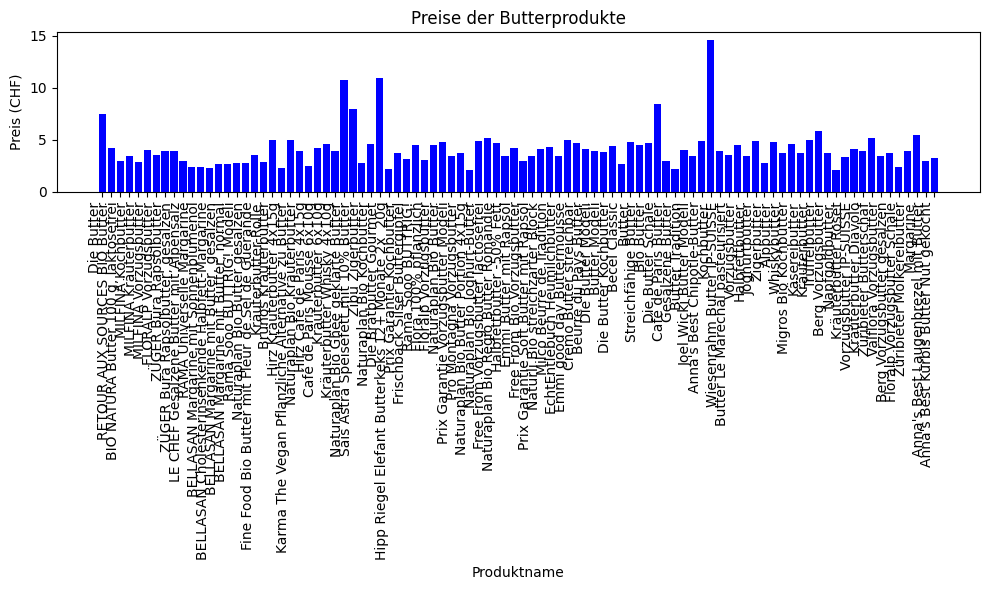

In [ ]:
import matplotlib.pyplot as plt

# DataFrame anzeigen
print(df_all)

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
plt.bar(df_all['productname_raw'], df_all['price_raw'], color='blue')
plt.xlabel('Produktname')
plt.ylabel('Preis (CHF)')
plt.title('Preise der Butterprodukte')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Diagramm anzeigen
plt.show()


    product_type web-scraper-order  \
0           eggs      1698755441-1   
1           eggs      1698755441-2   
2           eggs      1698755441-3   
3           eggs      1698755441-4   
4           eggs      1698755441-5   
..           ...               ...   
103         eggs     1698742125-82   
104         eggs     1698742125-83   
105         eggs     1698742125-84   
106         eggs     1698742125-85   
107         eggs     1698742125-86   

                                 web-scraper-start-url  \
0    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
1    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
2    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
3    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
4    https://www.aldi-now.ch/de/milchprodukte-&-eie...   
..                                                 ...   
103  https://www.migros.ch/de/search?query=Eier&fil...   
104  https://www.migros.ch/de/search?query=Eier&fil...   
105  https://www.migr

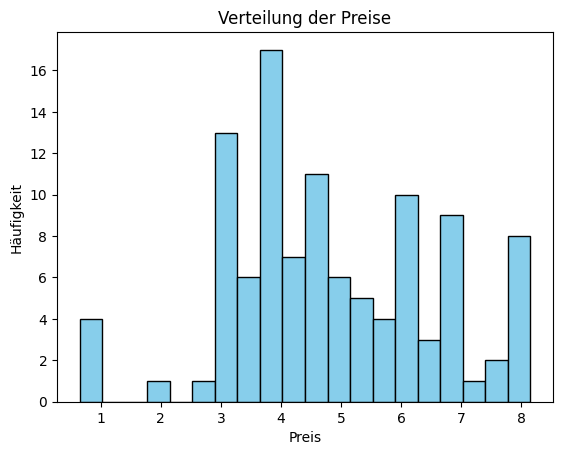

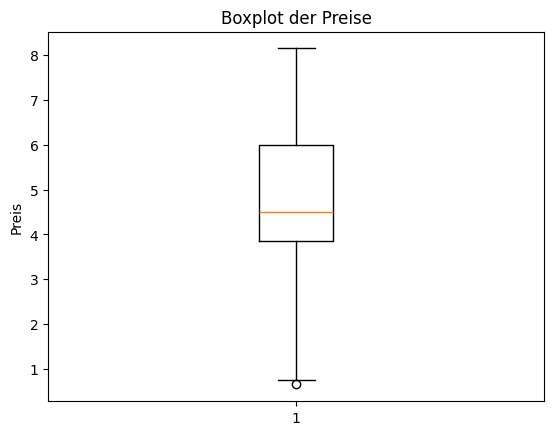

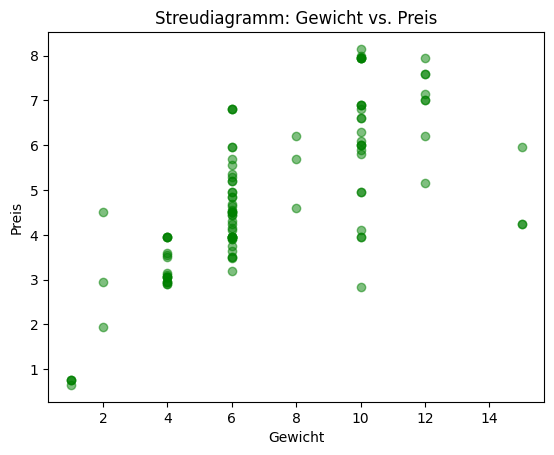

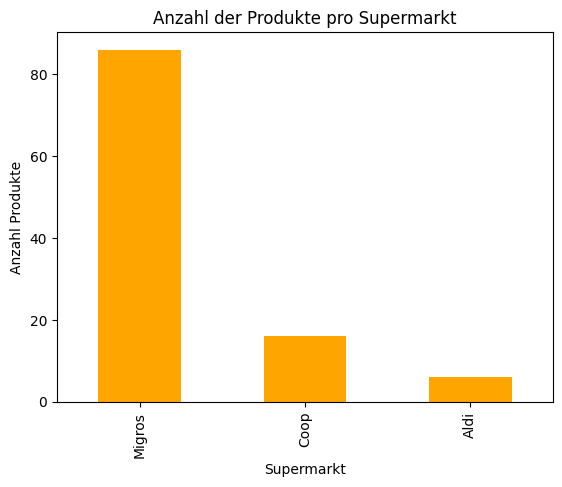

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Verbindung zur SQLite-Datenbank herstellen (Pfad zur Datenbank anpassen)
conn = sqlite3.connect('../groceries_database.db')  # Der Pfad '../' geht eine Ebene nach oben, wenn dein Notebook in /EDA/ liegt.

# Query the SQL-table for butter_table (all records)
cursor = conn.cursor()
cursor.execute('''SELECT *
               FROM eggs_table''')

# Überprüfe, ob es Ergebnisse gibt
if cursor.description is not None:
    # Spaltennamen extrahieren
    columns = [description[0] for description in cursor.description]

    # DataFrame erstellen
    df_all = pd.DataFrame(cursor.fetchall(), columns=columns)

    # DataFrame anzeigen
    print(df_all)
else:
    print("Die Abfrage hat keine Ergebnisse zurückgegeben.")

# Histogramm
plt.hist(df_all['price_raw'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Preis')
plt.ylabel('Häufigkeit')
plt.title('Verteilung der Preise')
plt.show()

# Boxplot
plt.boxplot(df_all['price_raw'])
plt.ylabel('Preis')
plt.title('Boxplot der Preise')
plt.show()

# Streudiagramm
plt.scatter(df_all['pieces_raw'], df_all['price_raw'], alpha=0.5, color='green')
plt.xlabel('Gewicht')
plt.ylabel('Preis')
plt.title('Streudiagramm: Gewicht vs. Preis')
plt.show()

# Balkendiagramm
df_all['Supermarkt'].value_counts().plot(kind='bar', color='orange')
plt.xlabel('Supermarkt')
plt.ylabel('Anzahl Produkte')
plt.title('Anzahl der Produkte pro Supermarkt')
plt.show()


In [ ]:
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Verbindung zur SQLite-Datenbank herstellen (Pfad zur Datenbank anpassen)
conn = sqlite3.connect('../groceries_database.db')  # Der Pfad '../' geht eine Ebene nach oben, wenn dein Notebook in /EDA/ liegt.

# Query the SQL-table for eggs_table (all records)
cursor = conn.cursor()
cursor.execute('''SELECT *
               FROM eggs_table''')

# Überprüfe, ob es Ergebnisse gibt
if cursor.description is not None:
    # Spaltennamen extrahieren
    columns = [description[0] for description in cursor.description]

    # DataFrame erstellen
    df_all = pd.DataFrame(cursor.fetchall(), columns=columns)
else:
    print("Die Abfrage hat keine Ergebnisse zurückgegeben.")

# Annahme: Verwende 'pieces_raw' als unabhängige Variable und 'price_raw' als abhängige Variable
X = df_all[['pieces_raw']]  # Merkmal
y = df_all['price_raw']  # Zielvariable

# Aufteilung in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression-Modell erstellen und trainieren
model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersagen für Testdaten
y_pred = model.predict(X_test)

# Bewertung des Modells
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 2.87762522898774


# 6. Model evaluation using suitable measures of fit (e.g. r-squared, rmse, accuracy, recall, precision, ...)

## Regression (z.B., lineare Regression):

In [ ]:
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Verbindung zur SQLite-Datenbank herstellen (Pfad zur Datenbank anpassen)
conn = sqlite3.connect('../groceries_database.db')  # Der Pfad '../' geht eine Ebene nach oben, wenn dein Notebook in /EDA/ liegt.

# Query the SQL-table for eggs_table (all records)
cursor = conn.cursor()
cursor.execute('''SELECT *
               FROM eggs_table''')

# Überprüfe, ob es Ergebnisse gibt
if cursor.description is not None:
    # Spaltennamen extrahieren
    columns = [description[0] for description in cursor.description]

    # DataFrame erstellen
    df_all = pd.DataFrame(cursor.fetchall(), columns=columns)
else:
    print("Die Abfrage hat keine Ergebnisse zurückgegeben.")

# Annahme: Verwende 'pieces_raw' als unabhängige Variable und 'price_raw' als abhängige Variable
X = df_all[['pieces_raw']]  # Merkmal
y = df_all['price_raw']  # Zielvariable

# Aufteilung in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression-Modell erstellen und trainieren
model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersagen für Testdaten
y_pred = model.predict(X_test)

# Bewertung des Modells
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 2.87762522898774
R-squared: 0.1584468116768899


## Klassifikation (z.B., logistische Regression):

In [ ]:
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Verbindung zur SQLite-Datenbank herstellen (Pfad zur Datenbank anpassen)
conn = sqlite3.connect('../groceries_database.db')  # Der Pfad '../' geht eine Ebene nach oben, wenn dein Notebook in /EDA/ liegt.

# Query the SQL-table for eggs_table (all records)
cursor = conn.cursor()
cursor.execute('''SELECT *
               FROM eggs_table''')

# Überprüfe, ob es Ergebnisse gibt
if cursor.description is not None:
    # Spaltennamen extrahieren
    columns = [description[0] for description in cursor.description]

    # DataFrame erstellen
    df_all = pd.DataFrame(cursor.fetchall(), columns=columns)
else:
    print("Die Abfrage hat keine Ergebnisse zurückgegeben.")

# Annahme: Verwende 'pieces_raw' als unabhängige Variable und 'price_raw' als abhängige Variable
X = df_all[['pieces_raw']]  # Merkmal

# Beispiel: Schwellenwert auf 3.0 festlegen
threshold = 3.0
y = df_all['price_raw'] > threshold  # Zielvariable (binäre Kategorie)

# Aufteilung in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistische Regression erstellen und trainieren
model = LogisticRegression()
model.fit(X_train, y_train)

# Vorhersagen für Testdaten
y_pred = model.predict(X_test)

# Bewertung des Klassifikationsmodells
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.8636363636363636
Precision: 0.8421052631578947
Recall: 1.0
F1 Score: 0.9142857142857143
Confusion Matrix:
[[ 3  3]
 [ 0 16]]


## Correct interpretation of model results and measures of fit

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Annahme: y_test sind die tatsächlichen Klassen, und y_pred sind die vorhergesagten Klassen
# Hier sollte der Code je nach Art des Modells und der Daten angepasst werden.

# Genauigkeit
accuracy = accuracy_score(y_test, y_pred)
print(f'Genauigkeit: {accuracy}')

# Präzision
precision = precision_score(y_test, y_pred)
print(f'Präzision: {precision}')

# Recall (Sensitivität)
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1}')

# Verwechslungsmatrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Verwechslungsmatrix:')
print(conf_matrix)

# Interpretation der Ergebnisse
# Hier können Sie je nach Anwendungsfall spezifischere Aussagen machen.

if precision > 0.8:
    print("Die Präzision ist hoch, was darauf hinweist, dass das Modell genau ist bei der Vorhersage der positiven Klasse.")
else:
    print("Die Präzision sollte verbessert werden, um falsch positive Vorhersagen zu reduzieren.")

if recall > 0.7:
    print("Der Recall ist hoch, was darauf hinweist, dass das Modell viele der tatsächlich positiven Fälle erfasst.")
else:
    print("Der Recall sollte verbessert werden, um keine positiven Fälle zu übersehen.")

# Weitere Interpretationen je nach spezifischem Kontext und Anforderungen.


Genauigkeit: 0.8636363636363636
Präzision: 0.8421052631578947
Recall: 1.0
F1-Score: 0.9142857142857143
Verwechslungsmatrix:
[[ 3  3]
 [ 0 16]]
Die Präzision ist hoch, was darauf hinweist, dass das Modell genau ist bei der Vorhersage der positiven Klasse.
Der Recall ist hoch, was darauf hinweist, dass das Modell viele der tatsächlich positiven Fälle erfasst.
